# Using the GrainSizeTools script through JupyterLab or the notebook: first steps

> IMPORTANT NOTE: This Jupyter notebook example only applies to GrainSizeTools v3.0+ Please check your script version before using this notebook. You will be able to reproduce all the results shown in this tutorial using the dataset provided with the script, the ```file data_set.txt```

## Running the script in Jupyter lab/notebooks

The first step is to execute the code to get all the functionalities. JupyterLab (or Jupyter notebooks) allows you to run any code using the following code snippet: ``%run + the Python file to run``. In this case you must set the full filepath that indicates where the file ``GrainSizeTools_script.py`` is located in your system. If the script was executed correctly you will see that all GrainSizeTools (GST) modules have been loaded correctly and a welcome message as follows:

In [1]:
%run C:/Users/marco/Documents/GitHub/GrainSizeTools/grain_size_tools/GrainSizeTools_script.py

module plot imported
module averages imported
module stereology imported
module piezometers imported
module template imported

Welcome to GrainSizeTools script
A free open-source cross-platform script to visualize and characterize grain size
population and estimate differential stress via paleopizometers.

Version: v3.0RC0 (2020-04-23)
Documentation: https://marcoalopez.github.io/GrainSizeTools/

Type get.functions_list() to get a list of the main methods



---

## Get information on the GrainSizeTools methods

First, to get a list of the main methods type

In [2]:
get.functions_list()


List of main functions
summarize              -> get the properties of the data population
conf_interval          -> estimate a robust confidence interval using the t-distribution
calc_diffstress        -> estimate diff. stress from grain size using piezometers

plot.distribution      -> visualize the distribution of grain sizes and locate the averages
plot.qq_plot           -> test the lognormality of the dataset (q-q plot + Shapiro-Wilk test)
plot.area_weighted     -> visualize the area-weighed distribution of grain sizes
plot.normalized        -> visualize a normalized distribution of grain sizes

stereology.Saltykov    -> approximate the actual grain size distribution via the Saltykov method
stereology.calc_shape  -> approximate the lognormal shape of the actual distribution

You can get more information about the methods using the following ways:
    (1) Typing ? or ?? after the function name, e.g. ?summarize
    (2) Typing help plus the name of the function, e.g. help(summarize)

The script is implemented around several modules. To access a method within a module you will have to type the name of the module and then, separated by a dot, the name of the method.For example to access the method ``qq_plot`` of the plot module you should write

```python
plot.qq_plot()
```
and then provide the required parameters within the parenthesis.

To access the methods within a module, type the module name plus the dot and hit the tab key and a complete list of methods will pop up.

### Get detailed information on methods

You can get detailed information about any method or function of the script in different ways. The first is through the console using the character ? before the method

In [3]:
?conf_interval

Signature: conf_interval(data, confidence=0.95)
Docstring:
Estimate the confidence interval using the t-distribution with n-1
degrees of freedom t(n-1). This is the way to go when sample size is
small (n < 30) and the standard deviation cannot be estimated accurately.
For large datasets, the t-distribution approaches the normal distribution.

Parameters
----------
data : array-like
    the dataset

confidence : float between 0 and 1, optional
    the confidence interval, default = 0.95

Assumptions
-----------
the data follows a normal or symmetric distrubution (when sample size
is large)

call_function(s)
----------------
Scipy's t.interval

Returns
-------
the arithmetic mean, the error, and the limits of the confidence interval
File:      c:\users\marco\documents\github\grainsizetools\grain_size_tools\grainsizetools_script.py
Type:      function


Another option in Jupyter's lab is to get the information interactively without having to call it from the console. To do this, right-click on the mouse and select "Show Context Help" from the menu. Now, every time you write a method in the interactive console, all the information will automatically appear in the "Contextual help" window. In this case, you may prefer to rearrange the windows using drag and drop so that you can see the notebook and the contextual help in parallel.

---

# Importing tabular data

For this, [Pandas](https://pandas.pydata.org/about/index.html) is the de facto standard Python library for data analysis and manipulation of table-like datasets (CSV, excel or text files among others). The library includes several tools for reading files and handling of missing data and when running the GrainSizeTools script pandas is imported as ```pd``` for its general use.

All Pandas methods to read data are all named ```pd.read_*``` where * is the file type. For example:

```python
pd.read_csv()      # read csv or txt files, default delimiter is ','
pd.read_table()    # read general delimited file, default delimiter is '\t' (TAB)
pd.read_excel()    # read excel files
pd.read_html()     # read HTML tables
# etc.
```
For other supported file types see https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

The only mandatory argument for the reading methods is to define the path (local or URL) with the location of the file to be imported as follows.

In [4]:
# set the filepath, note that is enclosed in quotation marks
filepath = 'C:/Users/marco/Documents/GitHub/GrainSizeTools/grain_size_tools/DATA/data_set.txt'

# import the data
dataset = pd.read_table(filepath)

#display the data
dataset

,,Area,Circ.,Feret,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity
0,1,157.25,0.680,18.062,1535.0,0.5,131.634,13.500,1.101,0.908,0.937
1,2,2059.75,0.771,62.097,753.5,16.5,165.069,46.697,1.314,0.761,0.972
2,3,1961.50,0.842,57.871,727.0,65.0,71.878,46.923,1.139,0.878,0.972
3,4,5428.50,0.709,114.657,1494.5,83.5,19.620,63.449,1.896,0.528,0.947
4,5,374.00,0.699,29.262,2328.0,34.0,33.147,16.000,1.515,0.660,0.970
...,...,...,...,...,...,...,...,...,...,...,...
2656,2657,452.50,0.789,28.504,1368.0,1565.5,127.875,22.500,1.235,0.810,0.960
2657,2658,1081.25,0.756,47.909,1349.5,1569.5,108.246,31.363,1.446,0.692,0.960
2658,2659,513.50,0.720,32.962,1373.0,1586.0,112.286,20.496,1.493,0.670,0.953
2659,2660,277.75,0.627,29.436,1316.0,1601.5,159.102,17.002,1.727,0.579,0.920


Some important things to note about the code snippet used above are:

- We used the ``pd.read_table()`` method to import the file. By default, this method assumes that the data to import is stored in a text file separated by tabs. Alternatively you can use the ``pd.read_csv()`` method (note that csv means comma-separated values) and set the delimiter to ``'\t'`` as follows: ``pd.read_csv(filepath, sep='\t')``.
- When calling the variable ``dataset`` it returs a visualization of the dataset imported, which is a tabular-like dataset with 2661 entries and 11 columns with different grain properties.

In Python, this type of tabular-like objects are called (Pandas) *DataFrame* and allow a flexible and easy to use data analysis. Just for checking:

In [5]:
# show the variable type
type(dataset)

pandas.core.frame.DataFrame

> 👉 Pandas' reading methods give you a lot of control over how a file is read. To keep things simple, I list the most commonly used arguments:

```python
sep         # Delimiter/separator to use.
header      # Row number(s) to use as the column names. By default it takes the first row as the column names (header=0). If there is no columns names in the file you must set header=None
skiprows    # Number of lines to skip at the start of the file (an integer).
na_filter   # Detect missing value markers. False by default.
sheet_name  # Only excel files, the excel sheet name either a number or the full name.
```

> more details on Pandas csv read method: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

The GrainSizeTools script includes a method named ```get_filepath()``` to get the path of a file through a file selection dialog instead of directly writing it. This can be used in two ways:

```python
# store the path in a variable (here named filepath for convenience) and then use it when calling the read method
filepath = get_filepath()
dataset = pd.read_csv(filepath, sep='\t')

# use get_filepath() directly within the read method
dataset = pd.read_csv(get_filepath(), sep='\t')
```

Lastly, Pandas also allows to directly import tabular data from the clipboard (i.e. data copied using copy-paste commands). For example, after copying the table from a text file, excel spreadsheet or a website using: 

```python
dataset = pd.read_clipboard()
```

---

## Basic data manipulation (using Pandas)

Let's first see how the data set looks like. Instead of calling the variable (as in the example before) we now use the ``head()`` and ``tail()`` methods so that it only shows us the first (or last) rows of the data set

In [6]:
dataset.head()  # returns 5 rows by default, you can define any number within the parenthesis

,,Area,Circ.,Feret,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity
0,1,157.25,0.680,18.062,1535.0,0.5,131.634,13.500,1.101,0.908,0.937
1,2,2059.75,0.771,62.097,753.5,16.5,165.069,46.697,1.314,0.761,0.972
2,3,1961.50,0.842,57.871,727.0,65.0,71.878,46.923,1.139,0.878,0.972
3,4,5428.50,0.709,114.657,1494.5,83.5,19.620,63.449,1.896,0.528,0.947
4,5,374.00,0.699,29.262,2328.0,34.0,33.147,16.000,1.515,0.660,0.970


The example dataset has 11 different columns (one without a name). To interact with one of the columns we must call its name in square brackets with the name in quotes as follows:

In [7]:
# get the column 'Area' and multiplied by two
dataset['Area'] * 2

0         314.5
1        4119.5
2        3923.0
3       10857.0
4         748.0
         ...   
2656      905.0
2657     2162.5
2658     1027.0
2659      555.5
2660     1450.0
Name: Area, Length: 2661, dtype: float64

If you want to remove one or more columns, you can do it with the ``drop()`` method. For example, let's remove the column without a name.

In [8]:
# Remove the column without a name from the DataFrame
dataset = dataset.drop(' ', axis=1)
dataset.head(3)

,Area,Circ.,Feret,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity
0,157.25,0.680,18.062,1535.0,0.5,131.634,13.500,1.101,0.908,0.937
1,2059.75,0.771,62.097,753.5,16.5,165.069,46.697,1.314,0.761,0.972
2,1961.50,0.842,57.871,727.0,65.0,71.878,46.923,1.139,0.878,0.972


If you want to remove more than one column pass a list of columns instead as in the example below:
```python
dataset.drop(['FeretX', 'FeretY'], axis=1)
```

### Create new columns

The example dataset does not contain any column with the grain diameters and therefore we have to estimate them. For example, assuming the data comes from a thin section, you can estimate the apparent diameters from the section areas using the equivalent circular diameter (ECD) formula which is

$ECD = 2 \cdot \sqrt{areas / \pi}$

we will call the new column ``'diameters'``

In [9]:
dataset['diameters'] = 2 * np.sqrt(dataset['Area'] / np.pi)
dataset.head()

,Area,Circ.,Feret,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,diameters
0,157.25,0.680,18.062,1535.0,0.5,131.634,13.500,1.101,0.908,0.937,14.149803
1,2059.75,0.771,62.097,753.5,16.5,165.069,46.697,1.314,0.761,0.972,51.210889
2,1961.50,0.842,57.871,727.0,65.0,71.878,46.923,1.139,0.878,0.972,49.974587
3,5428.50,0.709,114.657,1494.5,83.5,19.620,63.449,1.896,0.528,0.947,83.137121
4,374.00,0.699,29.262,2328.0,34.0,33.147,16.000,1.515,0.660,0.970,21.821815


You can see a new column named diameters.

> 👉  In the examples above we define the square root as ``np.sqrt``, the arithmetic mean as ``np.mean``, and pi as  ``np.pi``. In this case, ``np.`` stems for NumPy or numerical Python, a core package for scientific computing with Python, and the keyword after the dot is the method or the scientific value to be applied. If you write in the console ``np.`` and then press the TAB key, you will see a large list of available methods. In general, the method names are equivalent to those used in MATLAB or R but always by adding the ``np.`` first.

### A list of useful Pandas methods

Some things you might want to try (just copy-paste in interactive cells below and explore):

```python
# Reduction
dataset.mean()          # estimate the mean for all columns
dataset['Area'].mean()  # estimate the mean only for the column Area
dataset.std()           # estimate the (Bessel corrected) standard deviation
dataset.median()        # estimate the median
dataset.mad()           # estimate the mean absolute deviation
dataset.var()           # estimate the unbiased variace
dataset.sem()           # estimate the standard error of the mean
dataset.skew()          # estimate the sample skewness
dataset.kurt()          # estimate the sample kurtosis
dataset.quantile()      # estimate the sample quantile

# Information
dataset.describe()   # generate descriptive statistics
dataset.info()       # display info of the DataFrame
dataset.shape()      # (rows, columns)
dataset.count()      # number of non-null values

dataset.dropna()        # remove missing values from the data

# writing to disk
dataset.to_csv(filename)    # save as csv file, the filename must be within quotes
dataset.to_excel(filename)  # save as excel file
```

In [10]:
# estimate the mean of all columns
dataset.mean()

Area          1213.823750
Circ.            0.730233
Feret           44.808749
FeretX        1533.019542
FeretY         764.684517
FeretAngle      90.622313
MinFeret        31.016330
AR               1.451459
Round            0.719253
Solidity         0.943795
diameters       34.785694
dtype: float64

In [11]:
# Generate descriptive statistics
dataset.describe()

,Area,Circ.,Feret,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,diameters
count,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000
mean,1213.823750,0.730233,44.808749,1533.019542,764.684517,90.622313,31.016330,1.451459,0.719253,0.943795,34.785694
std,1331.462328,0.069441,21.764062,805.162769,365.317776,53.570466,17.079455,0.337358,0.136751,0.027590,18.318569
min,8.000000,0.377000,4.301000,2.500000,0.500000,1.071000,2.500000,1.004000,0.236000,0.764000,3.191538
25%,346.500000,0.691000,29.108000,824.000000,473.500000,41.566000,18.063000,1.211000,0.626000,0.932000,21.004226
50%,780.750000,0.742000,41.404000,1583.500000,743.000000,87.274000,28.306000,1.368000,0.731000,0.950000,31.529062
75%,1589.500000,0.780000,56.447000,2212.000000,1052.500000,141.746000,40.791000,1.597000,0.826000,0.963000,44.986823
max,19259.750000,0.873000,177.229000,2930.000000,1634.000000,179.576000,146.363000,4.244000,0.996000,0.985000,156.595898


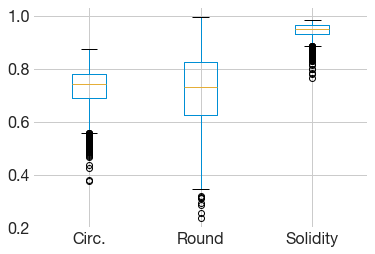

In [12]:
dataset[['Circ.', 'Round', 'Solidity']].boxplot()